In [3]:
import numpy as np 
import matplotlib
# Forces the non-interactive backend designed for file output
matplotlib.use('Agg') 
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
import pandas as pd
import math

#Color palette
colors = [
    '#000000',  # Black
    '#E69F00',  # Orange
    '#56B4E9',  # Sky Blue
    '#009E73',  # Bluish Green
    '#F0E442',  # Yellow
    'purple',  # Blue
    '#D55E00',  # Vermilion
]

# Style settings
# --- Corrected rcParams Block ---
plt.rcParams.update({
    ## Text and Font Settings
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "axes.labelsize": 25,
    "font.size": 16,
    "legend.fontsize": 16,
    "text.latex.preamble": r"\usepackage{amsmath}",

    ## Tick Settings
    "xtick.labelsize": 22,
    "ytick.labelsize": 22,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,
    "ytick.right": True,
    "xtick.major.size": 8,
    "ytick.major.size": 8,
    "xtick.minor.size": 4,
    "ytick.minor.size": 4,
    
    ## Axes Line Width (for a bolder border)
    "axes.linewidth": 1.5,
    
    ## Turn the default grid OFF in rcParams
    "axes.grid": False,
})

In [4]:
# Load data
dir = "../data" # Directory containing data files
plot_dir = "../image/plot"
input_noise = pd.read_csv(f"{dir}/Noise_sim_postlayout.csv")
gain = pd.read_csv(f"{dir}/Gain_mag_phase.csv")
drift = pd.read_csv(f"{dir}/gain_drift.csv")
gain_test = pd.read_csv(f"{dir}/CMRR_test.csv")
                        

## Input noise plot 

In [5]:

col = ['f', 'LNA1', 'LNA2']
input_noise.columns = col

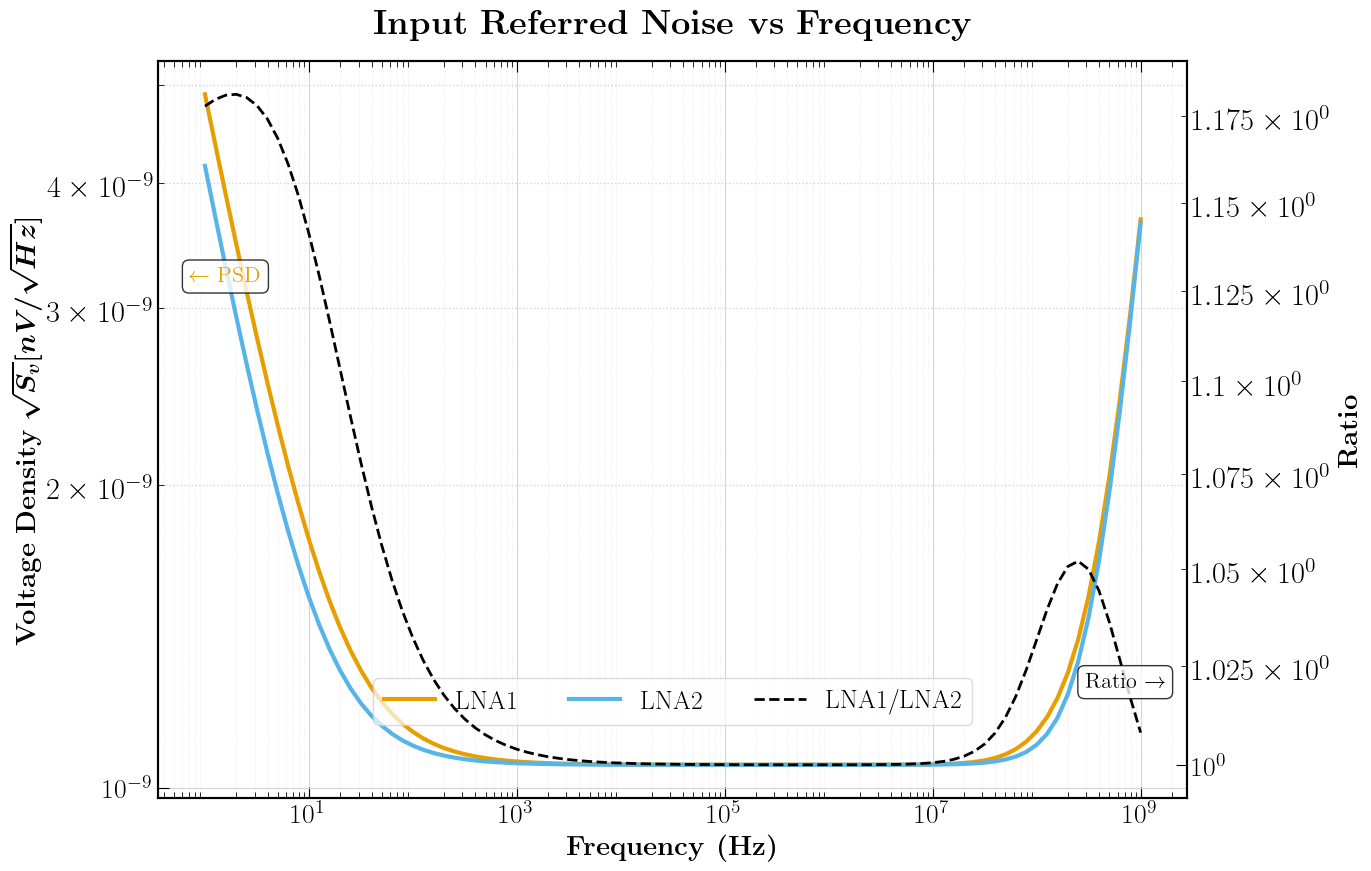

In [6]:

# --- 2. Plot Setup ---
fig, ax_left = plt.subplots(figsize=(14, 9))

# Create the Twin Axis sharing the X axis
ax_right = ax_left.twinx()

# --- 3. Plotting ---

# Plot Left Axis Data (Voltage Density)
# Note: We capture the plot objects (l1, l2) to use in the legend later
l1 = ax_left.loglog(input_noise['f'], input_noise['LNA1'], 
                    label='LNA1', color=colors[1], lw=3)
l2 = ax_left.loglog(input_noise['f'], input_noise['LNA2'], 
                    label='LNA2', color=colors[2], lw=3)

# Plot Right Axis Data (Ratio)
ratio_color = 'black'
l3 = ax_right.loglog(input_noise['f'], input_noise['LNA1']/input_noise['LNA2'], 
                     linestyle='--', label='LNA1/LNA2', color=ratio_color, lw=2)

# --- 4. Formatting ---

# Global Settings
plt.title(r'\textbf{Input Referred Noise vs Frequency}', fontsize=25, pad=20)
ax_left.grid(True, which='both', linestyle=':', linewidth=1, color='lightgray')
ax_left.set_xlabel(r'\textbf{Frequency (Hz)}', fontsize=20)

# Left Y-Axis Formatting
ax_left.set_ylabel(r'\textbf{Voltage Density} $\boldsymbol{\sqrt{S_v} [nV/ \sqrt{Hz}]}$', 
                   fontsize=20)
ax_left.tick_params(axis='both', which='major', labelsize=20)

# Right Y-Axis Formatting
ax_right.set_ylabel(r'\textbf{Ratio}', fontsize=20, color=ratio_color)
ax_right.tick_params(axis='y', labelsize=20, colors=ratio_color) # Color the ticks to match
ax_right.spines['right'].set_color(ratio_color) # Color the spine to match

# --- 5. The Combined Legend ---
# We gather handles (lines) and labels from both axes
lines = l1 + l2 + l3  # Combine the lists of lines
labels = [l.get_label() for l in lines] # Extract labels

# Create one legend on the main axis
ax_left.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 0.18),
               fancybox=True, shadow=False, ncol=3, fontsize=18.5,
               framealpha=0.7)

# --- 6. Annotations (Explicit visual cues) ---

# Annotation for Left Axis
ax_left.annotate(r'$\leftarrow$  PSD    ', xy=(0.03, 0.7), xycoords='axes fraction',
                 fontsize=16, fontweight='bold', color=colors[1],
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec='black', alpha=0.8))

# Annotation for Right Axis
ax_right.annotate(r'Ratio $\rightarrow$', xy=(0.9, 0.15), xycoords='axes fraction',
                  fontsize=16, fontweight='bold', color=ratio_color,
                  bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=ratio_color, alpha=0.8))

# 1. Define the Locator
# This tells matplotlib to place ticks at 2, 3, 4...9 for every decade
minor_locator = LogLocator(base=10.0, subs=(0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9), numticks=12)

# 2. Apply it to the X-Axis
ax_left.xaxis.set_minor_locator(minor_locator)

# 3. Draw the Grids
ax_left.grid(True, which='major', linestyle='-', linewidth=0.8, color='lightgray')
ax_left.grid(True, which='minor', axis='x', linestyle=':', linewidth=0.5, color='lightgray', alpha=0.7)

plt.tight_layout()
plt.savefig(f"{plot_dir}/Input_Referred_Noise.png", dpi=300)
plt.show()


### Input noise MC 

In [72]:
noise_LNA1 = pd.read_csv(f"{dir}/Noise_MC_LNA1_27degC.csv")
noise_LNA2 = pd.read_csv(f"{dir}/Noise_MC_LNA2_27degC.csv")

In [77]:
np.size(noise_LNA1,axis = 0)
# noise_LNA1.head()

Vcm = [-0.5,0,0.5]  # For Vcm = -0.5, 0.0 and 0.5 V
num_sim = int((np.size(noise_LNA2, axis = 1)-4)/len(Vcm))  # Number of MC simulation for each Vcm
col1 = ['f']
col2 = ['f']
for i in Vcm: 
    for j in range(num_sim):
        col1.append(f'LNA1_Vcm{j+1}_MC{j+1}')
        col2.append(f'LNA2_Vcm{j+1}_MC{j+1}')
#col for the current 
col1.append('MCnumber')
col2.append('MCnumber')
for i in Vcm:
    col1.append(f'i_LNA1_Vcm{i}_MC')
    col2.append(f'i_LNA1_Vcm{i}_MC')
noise_LNA1.columns = col1
noise_LNA2.columns = col2   

# #Test plotting 
# fix,ax = plt.subplots(figsize=(14, 9))
# for i in range(num_type): 
#     for j in range(num_sim):
#         ax.plot(noise_LNA1['f'], noise_LNA1[f'LNA{i+1}_sim{j+1}'], label=f'LNA{i+1}_sim{j+1}', lw=1, alpha=0.3 if j>0 else 1, color=colors[i+1])
# ax.set_title(r'\textbf{Gain Drift over Temperature - MC Simulation}', fontsize=25, pad=20)
# ax.set_xlabel(r'\textbf{Temperature} $[^{\circ} C]$', fontsize=20)
# ax.set_ylabel(r'\textbf{Gain (dB)}', fontsize=20)
# ax.tick_params(axis='both', which='major', labelsize=20)

## Bode plot

In [7]:
col = ['f', 'mag1', 'mag2', 'phase1', 'phase2']
gain.columns = col

In [41]:

def fc_loc(series):
    # Calculate the target magnitude: Max magnitude - 3 dB
    target_mag = series.max() - 3
    # print(target_mag)
    # Calculate the absolute difference between the target magnitude and each point in the series.
    # The minimum of this Series will correspond to the point closest to the target magnitude.
    abs_diff = (series - target_mag).abs()
    # print(abs_diff)
    # Get the index (which represents the frequency) where the absolute difference is minimum.
    # This is the "Cutoff Frequency Location" (-3dB point).
    cutoff_freq = abs_diff.idxmin()
    # print(cutoff_freq)
    # Return the index value
    return cutoff_freq
# print(fc_loc((gain['mag1'])))
# print(fc_loc((gain['mag2'])))


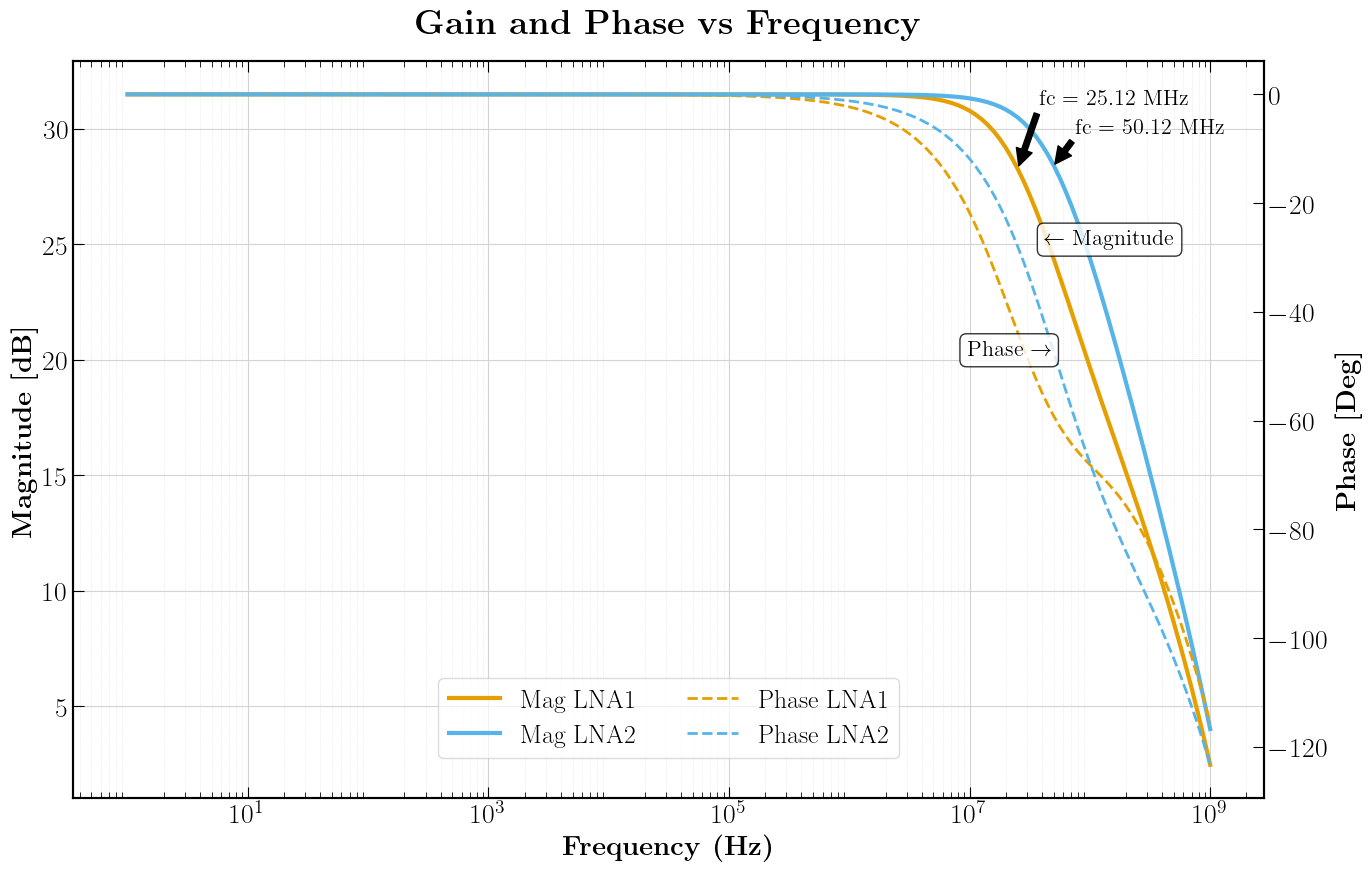

In [60]:


# --- 2. Plot Setup ---
fig, ax_left = plt.subplots(figsize=(14, 9))
ax_right = ax_left.twinx()

ratio_color = 'black'

# --- 3. Plotting ---
l1 = ax_left.semilogx(gain['f'], gain['mag1'], label='Mag LNA1', color=colors[1], lw=3)
l2 = ax_left.semilogx(gain['f'], gain['mag2'], label='Mag LNA2', color=colors[2], lw=3)

phase_style = '--'
l3 = ax_right.semilogx(gain['f'], gain['phase1'], label='Phase LNA1', color=colors[1], lw=2, linestyle=phase_style)
l4 = ax_right.semilogx(gain['f'], gain['phase2'], label='Phase LNA2', color=colors[2], lw=2, linestyle=phase_style)

# --- 4. Formatting ---
plt.title(r'\textbf{Gain and Phase vs Frequency}', fontsize=25, pad=20)

# 1. Define the Locator
# This tells matplotlib to place ticks at 2, 3, 4...9 for every decade
minor_locator = LogLocator(base=10.0, subs=(0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9), numticks=12)

# 2. Apply it to the X-Axis
ax_left.xaxis.set_minor_locator(minor_locator)

# 3. Draw the Grids
ax_left.grid(True, which='major', linestyle='-', linewidth=0.8, color='lightgray')
ax_left.grid(True, which='minor', axis='x', linestyle=':', linewidth=0.5, color='lightgray', alpha=0.7)

# =========================================================

ax_left.set_xlabel(r'\textbf{Frequency (Hz)}', fontsize=20)
ax_left.set_ylabel(r'\textbf{Magnitude [dB]}', fontsize=20)
ax_left.tick_params(axis='both', which='major', labelsize=20)

ax_right.set_ylabel(r'\textbf{Phase [Deg]}', fontsize=20, color=ratio_color)
ax_right.tick_params(axis='y', labelsize=20, colors=ratio_color)
ax_right.spines['right'].set_color(ratio_color)

# --- 5. Legend ---
lines = l1 + l2 + l3 + l4
labels = [l.get_label() for l in lines]

ax_left.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 0.18),
               fancybox=True, shadow=False, ncol=2, fontsize=18.5, framealpha=0.7)

# --- 6. Annotations ---
ax_left.annotate(r'$\leftarrow$ Magnitude', xy=(0.815, 0.75), xycoords='axes fraction',
                 fontsize=16, fontweight='bold', color='black',
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec='black', alpha=0.8))

ax_right.annotate(r'Phase $\rightarrow$', xy=(0.75, 0.6), xycoords='axes fraction',
                  fontsize=16, fontweight='bold', color=ratio_color,
                  bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=ratio_color, alpha=0.8))

# Annotate cutoff frequencies
fc1_loc = fc_loc(gain['mag1'])
fc2_loc = fc_loc(gain['mag2'])          
ax_left.annotate(f'fc = {np.round(gain['f'][fc1_loc]/1e6,2)} MHz', xy=(gain['f'][fc1_loc], gain['mag1'][fc1_loc]), xytext=(gain['f'][fc1_loc]*1.5, gain['mag1'][fc1_loc]*1.1),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax_left.annotate(f'fc = {np.round(gain['f'][fc2_loc]/1e6,2)} MHz', xy=(gain['f'][fc2_loc], gain['mag2'][fc2_loc]), xytext=(gain['f'][fc2_loc]*1.5, gain['mag2'][fc2_loc]*1.05),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )


plt.tight_layout()
plt.savefig(f"{plot_dir}/gain.png", dpi=300)
plt.show()

## Gain drift plot 

In [61]:
col = ['T', 'LNA1', 'LNA2']
drift.columns = col

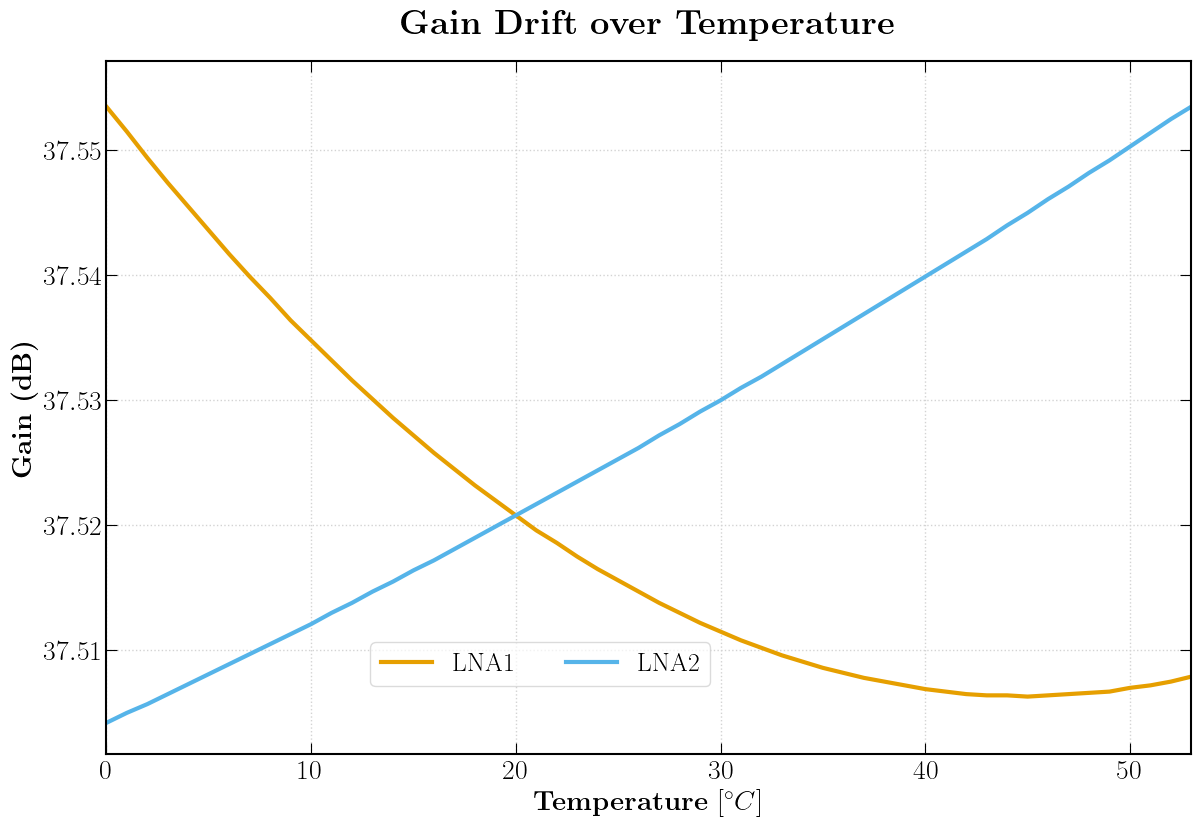

In [62]:
fix,ax = plt.subplots(figsize=(14, 9))
ax.plot(drift['T'], drift['LNA1'], label='LNA1', color=colors[1], lw=3)
ax.plot(drift['T'], drift['LNA2'], label='LNA2', color=colors[2], lw=3)
ax.set_title(r'\textbf{Gain Drift over Temperature}', fontsize=25, pad=20)
ax.set_xlabel(r'\textbf{Temperature} $[^{\circ} C]$', fontsize=20)
ax.set_ylabel(r'\textbf{Gain (dB)}', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.grid(True, which='both', linestyle=':', linewidth=1, color='lightgray')
ax.legend(loc='upper center', bbox_to_anchor=(0.4, 0.18),
          fancybox=True, shadow=False, ncol=2, fontsize=18.5,
          framealpha=0.7)       
ax.set_xlim(0,53)   
plt.savefig(f"{plot_dir}/Gain_drift.png", dpi=300)                                                                                                                 

### Gain drift MC 

In [69]:
Gain_drift_MC = pd.read_csv(f"{dir}/Gain_drift_MC_test1.csv")
Gain_drift_MC.head()

,temp (C),/voutdiff1 mcparamset 1 (V),/voutdiff1 mcparamset 2 (V),/voutdiff1 mcparamset 3 (V),/voutdiff1 mcparamset 4 (V),/voutdiff1 mcparamset 5 (V),/voutdiff1 mcparamset 6 (V),/voutdiff1 mcparamset 7 (V),/voutdiff1 mcparamset 8 (V),/voutdiff1 mcparamset 9 (V),/voutdiff2 mcparamset 1 (V),/voutdiff2 mcparamset 2 (V),/voutdiff2 mcparamset 3 (V),/voutdiff2 mcparamset 4 (V),/voutdiff2 mcparamset 5 (V),/voutdiff2 mcparamset 6 (V),/voutdiff2 mcparamset 7 (V),/voutdiff2 mcparamset 8 (V),/voutdiff2 mcparamset 9 (V)
0,0.0,38.3094,38.0991,35.7374,37.4556,33.9287,40.2482,37.2524,36.8141,38.1303,36.4789,37.3141,36.2540,37.4266,38.1874,37.9750,36.4421,37.0759,37.5022
1,1.0,38.3114,38.0968,35.7355,37.4532,33.9289,40.2435,37.2495,36.8135,38.1252,36.4822,37.3170,36.2552,37.4271,38.1869,37.9751,36.4440,37.0757,37.5026
2,2.0,38.3134,38.0946,35.7336,37.4507,33.9292,40.2389,37.2465,36.8130,38.1201,36.4855,37.3198,36.2563,37.4276,38.1865,37.9751,36.4458,37.0756,37.5030
3,3.0,38.3154,38.0924,35.7317,37.4484,33.9294,40.2343,37.2436,36.8125,38.1151,36.4887,37.3227,36.2574,37.4282,38.1860,37.9752,36.4476,37.0755,37.5035
4,4.0,38.3174,38.0902,35.7299,37.4461,33.9297,40.2298,37.2408,36.8121,38.1101,36.4920,37.3255,36.2586,37.4287,38.1856,37.9753,36.4494,37.0754,37.5039


In [ ]:
num_sim = int((np.size(Gain_drift_MC, axis = 1)-1)/2)
num_type = 2  # LNA1 and LNA2
col = ['T']
for i in range(num_type): 
    for j in range(num_sim):
        col.append(f'LNA{i+1}_sim{j+1}')
Gain_drift_MC.columns = col

#Test plotting 
fix,ax = plt.subplots(figsize=(14, 9))
for i in range(num_type): 
    for j in range(num_sim):
        ax.plot(Gain_drift_MC['T'], Gain_drift_MC[f'LNA{i+1}_sim{j+1}'], label=f'LNA{i+1}_sim{j+1}', lw=1, alpha=0.3 if j>0 else 1, color=colors[i+1])
ax.set_title(r'\textbf{Gain Drift over Temperature - MC Simulation}', fontsize=25, pad=20)
ax.set_xlabel(r'\textbf{Temperature} $[^{\circ} C]$', fontsize=20)
ax.set_ylabel(r'\textbf{Gain (dB)}', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)


,T,LNA1_sim1,LNA1_sim2,LNA1_sim3,LNA1_sim4,LNA1_sim5,LNA1_sim6,LNA1_sim7,LNA1_sim8,LNA1_sim9,LNA2_sim1,LNA2_sim2,LNA2_sim3,LNA2_sim4,LNA2_sim5,LNA2_sim6,LNA2_sim7,LNA2_sim8,LNA2_sim9
0,0.0,38.3094,38.0991,35.7374,37.4556,33.9287,40.2482,37.2524,36.8141,38.1303,36.4789,37.3141,36.2540,37.4266,38.1874,37.9750,36.4421,37.0759,37.5022
1,1.0,38.3114,38.0968,35.7355,37.4532,33.9289,40.2435,37.2495,36.8135,38.1252,36.4822,37.3170,36.2552,37.4271,38.1869,37.9751,36.4440,37.0757,37.5026
2,2.0,38.3134,38.0946,35.7336,37.4507,33.9292,40.2389,37.2465,36.8130,38.1201,36.4855,37.3198,36.2563,37.4276,38.1865,37.9751,36.4458,37.0756,37.5030
3,3.0,38.3154,38.0924,35.7317,37.4484,33.9294,40.2343,37.2436,36.8125,38.1151,36.4887,37.3227,36.2574,37.4282,38.1860,37.9752,36.4476,37.0755,37.5035
4,4.0,38.3174,38.0902,35.7299,37.4461,33.9297,40.2298,37.2408,36.8121,38.1101,36.4920,37.3255,36.2586,37.4287,38.1856,37.9753,36.4494,37.0754,37.5039
